In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [110]:
df_Swiggy=pd.read_csv('Swiggy Bangalore Outlet Details.csv')
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [111]:
df_Swiggy.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [112]:
df_Swiggy['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [113]:
# replace '--'rating with zero(0)
df_Swiggy['Rating']=df_Swiggy['Rating'].str.replace('--','0').astype(float)

In [114]:
#how mqany unique entries for 
df_Swiggy['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [115]:
df_Swiggy['Cost_for_Two']=df_Swiggy['Cost_for_Two'].apply(lambda x:int(x.strip('₹ ')))

In [116]:
df_Swiggy['Cost_for_Two'].dtype

dtype('int64')

In [117]:
# Distribution of 'Ratings'
df_valid_Ratings= df_Swiggy[df_Swiggy['Rating'] > 0]
df_valid_Ratings

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


<Axes: xlabel='Rating', ylabel='Density'>

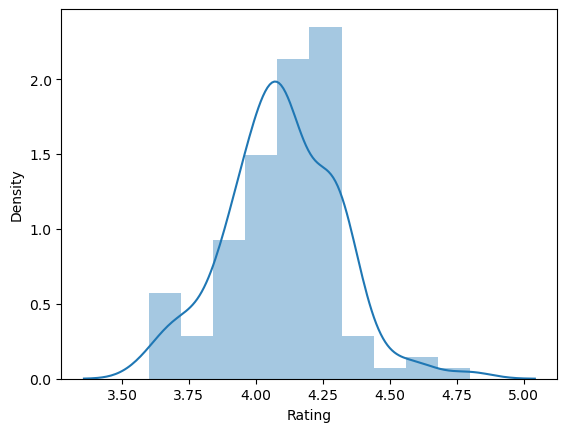

In [118]:
# Distribution 
sns.distplot(df_valid_Ratings['Rating'])

In [119]:
# Handling Feature: location
df_Swiggy['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [120]:
# Locations that contains 'Kormangala'
swiggy_Koramangala=df_Swiggy[df_Swiggy['Location'].str.contains(r'Koramangala')]
swiggy_Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [121]:
swiggy_HSR=df_Swiggy[df_Swiggy['Location'].str.contains(r'HSR')]
swiggy_HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300
41,Cakewala,Desserts,"HSR, HSR",4.3,450
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300


In [122]:
# Locations that contains 'BTM'
swiggy_BTM=df_Swiggy[df_Swiggy['Location'].str.contains(r'BTM')]
swiggy_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


# AREA-WISE ANALYSIS

## BTM AREA

<Axes: xlabel='Rating', ylabel='Count'>

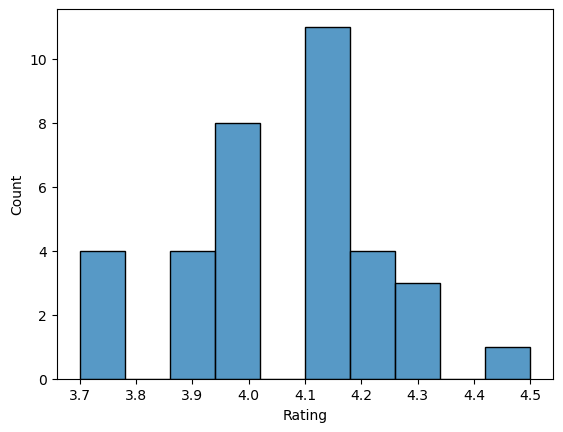

In [125]:
sns.histplot(swiggy_BTM['Rating'],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

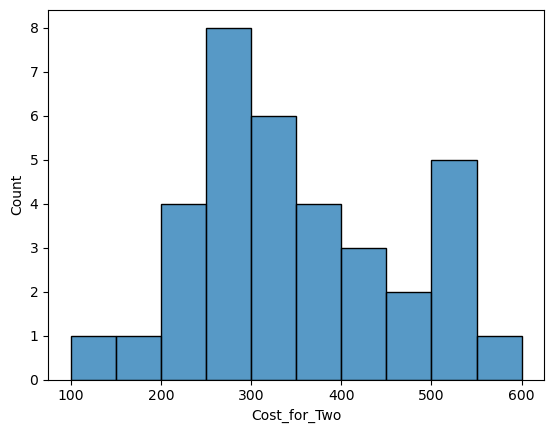

In [126]:
sns.histplot(swiggy_BTM['Cost_for_Two'],bins=10)

## HSR Area

<Axes: xlabel='Rating', ylabel='Count'>

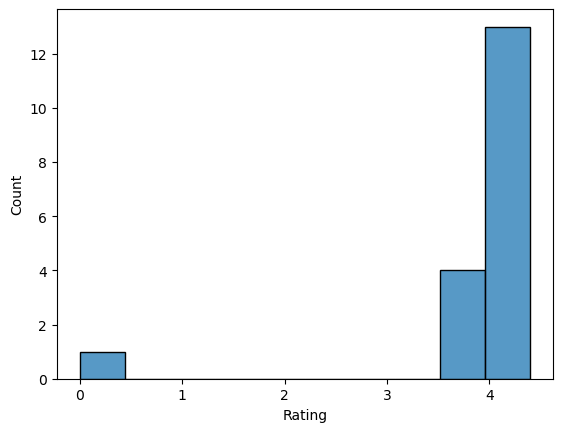

In [128]:
sns.histplot(swiggy_HSR['Rating'],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

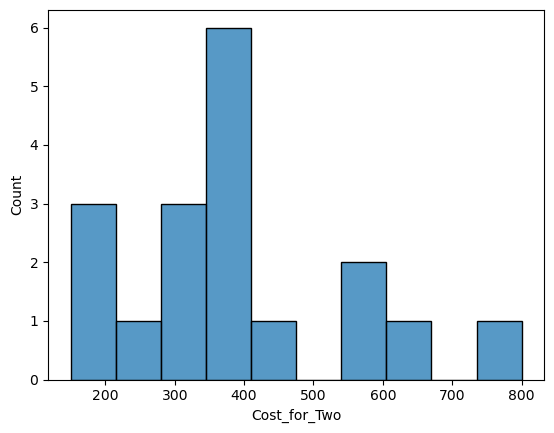

In [129]:
sns.histplot(swiggy_HSR['Cost_for_Two'],bins=10)

## Koramangala Area

<Axes: xlabel='Rating', ylabel='Count'>

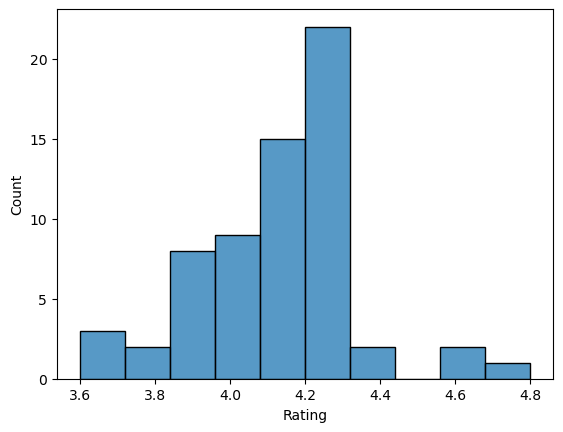

In [131]:
sns.histplot(swiggy_Koramangala['Rating'],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

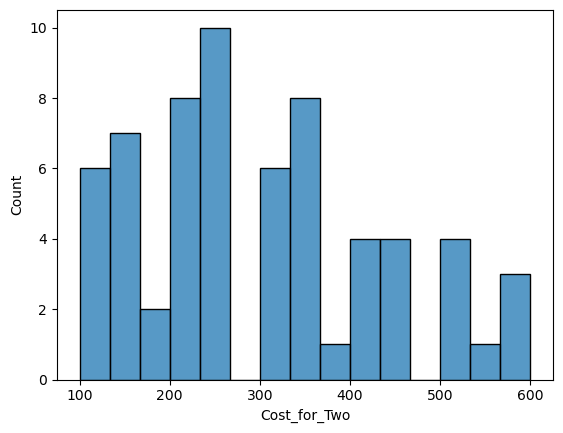

In [132]:
sns.histplot(swiggy_Koramangala['Cost_for_Two'],bins=15)

In [133]:
# Analyse 'Approx Cost of 2 people ' vs 'Rating'
df_Highest_Rated_Restaurants=df_Swiggy[df_Swiggy['Rating'] >=4.0]
df_Highest_Rated_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [134]:
df_Highest_Rated_Restaurants=df_Highest_Rated_Restaurants.loc[:,['Shop_Name','Rating','Cost_for_Two']]
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two
0,Kanti Sweets,4.3,150
1,Mumbai Tiffin,4.4,400
2,Sri Krishna sagar,4.1,126
3,Al Daaz,4.4,400
4,Beijing Bites,4.1,450
...,...,...,...
111,Bowl 99,4.4,200
114,Savoury Restaurant,4.1,600
115,Royal Treat,4.2,193
116,Thali 99,4.3,200


# GROUPING ON SHOP NAME AND RATING

In [136]:
df_Highest_Rated_Restaurants= df_Highest_Rated_Restaurants.groupby(['Shop_Name','Rating'])['Cost_for_Two'].agg('mean')
df_Highest_Rated_Restaurants

Shop_Name                                             Rating
99 VARIETY DOSA AND JUICE-Malli mane food court       4.1       100.0
99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food Court  4.1       200.0
A2B - Adyar Ananda Bhavan                             4.2       450.0
Abhiruchi Hotel                                       4.0       250.0
Al Daaz                                               4.4       400.0
                                                                ...  
Venu's Donne Biryani                                  4.3       300.0
WarmOven Cake & Desserts                              4.1       200.0
World of asia                                         4.0       250.0
XO Belgian Waffle                                     4.3       250.0
calicut cafe restaurant                               4.1       280.0
Name: Cost_for_Two, Length: 91, dtype: float64

In [137]:
df_Highest_Rated_Restaurants=df_Highest_Rated_Restaurants.reset_index()
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [138]:
fig = px.scatter(
    x=df_Highest_Rated_Restaurants["Cost_for_Two"],
    y=df_Highest_Rated_Restaurants["Rating"],
    color=df_Highest_Rated_Restaurants["Rating"],
    size=df_Highest_Rated_Restaurants["Cost_for_Two"],
    labels={
        "x": "Approx. Cost_for_Two (₹)",
        "y": "Rating",
        "color": "Rating_Indicator",
    },
)
fig.update_layout(
    template="plotly_dark",
    title="Analyse 'Approx Cost of 2 People' vs 'Rating'",
)
fig.show()

In [139]:
df_affordable_restaurant=df_Swiggy[
(df_Swiggy['Cost_for_Two']<=500)&(df_Swiggy["Rating"]>=4.0)
]
df_affordable_restaurant

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [140]:
df_affordable_restaurant=df_affordable_restaurant.groupby(['Shop_Name','Rating'])['Cost_for_Two'].agg('mean')
df_affordable_restaurant=df_affordable_restaurant.reset_index()
df_affordable_restaurant

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
76,Venu's Donne Biryani,4.3,300.0
77,WarmOven Cake & Desserts,4.1,200.0
78,World of asia,4.0,250.0
79,XO Belgian Waffle,4.3,250.0


In [141]:
df_affordable_restaurant.sort_values(by=['Rating'],ascending=True,inplace=True)
df_affordable_restaurant

,Shop_Name,Rating,Cost_for_Two
58,Paradise Biryani,4.0,300.0
29,Gyaani Da Punjabi Dhaba,4.0,500.0
34,Hyderabad Biryaani House,4.0,350.0
36,Just Shawarma,4.0,250.0
26,Donne Biryani Mandi,4.0,150.0
...,...,...,...
16,Bowl 99,4.4,200.0
20,Chinese Bae,4.5,450.0
54,Natural Ice Cream,4.6,150.0
21,Corner House Ice Cream,4.6,250.0


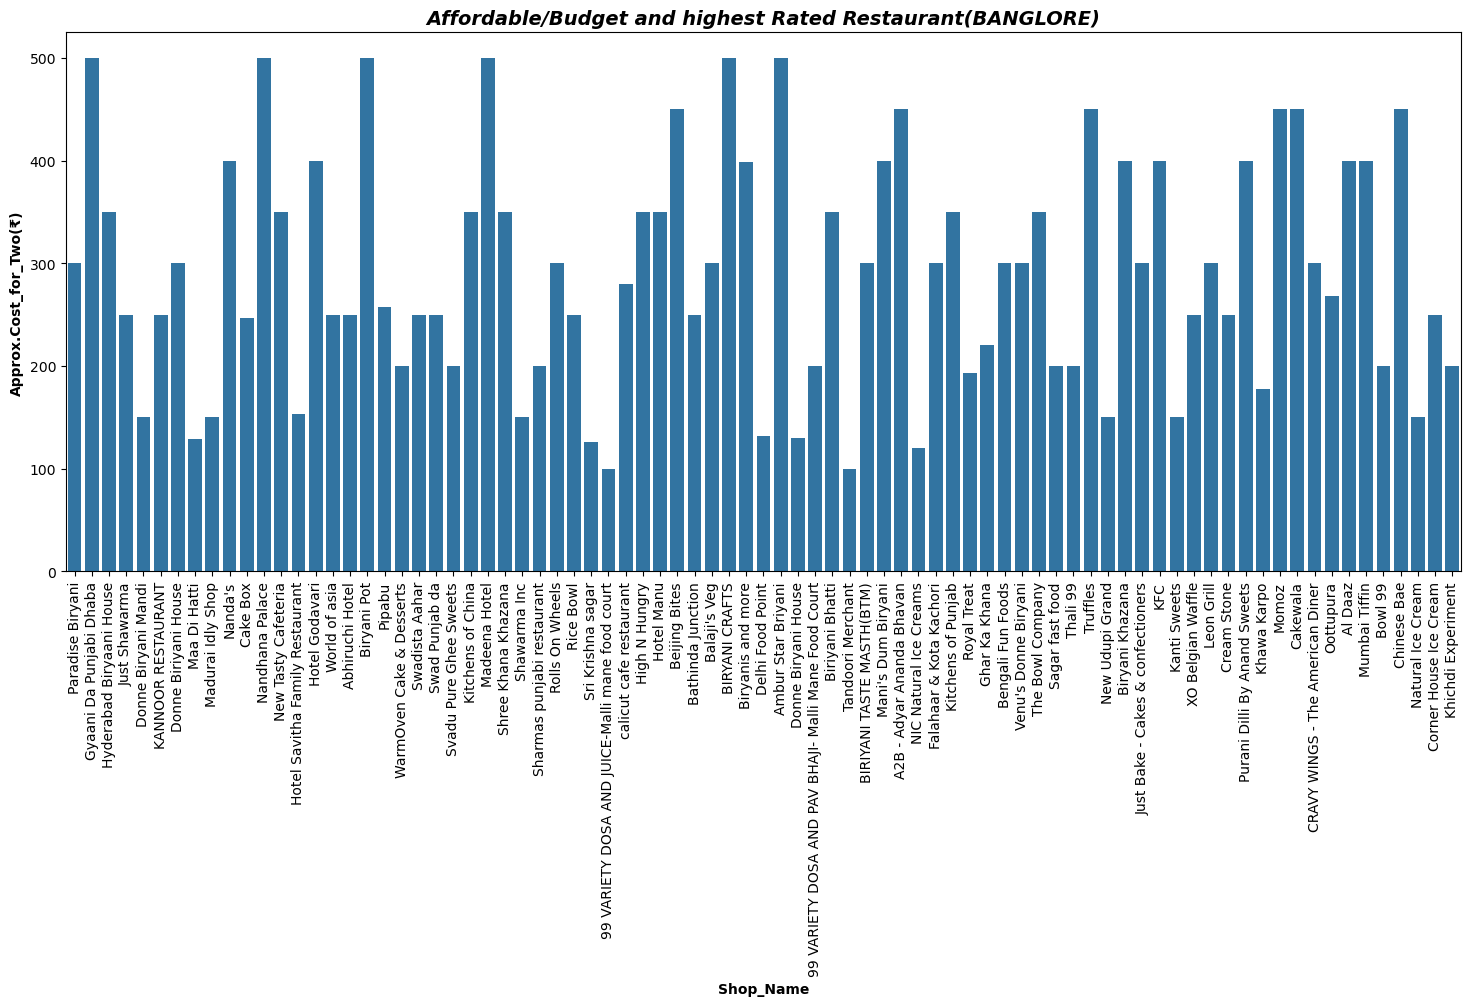

In [142]:
plt.figure(figsize=(18,7))
sns.barplot(
    x=df_affordable_restaurant['Shop_Name'],
    y=df_affordable_restaurant['Cost_for_Two'],
    data=df_affordable_restaurant,
)
plt.title(
    'Affordable/Budget and highest Rated Restaurant(BANGLORE)',
    fontsize=14,
    fontweight='bold',
    fontstyle='italic',
)
plt.xlabel('Shop_Name',fontsize=10 , fontweight='bold')
plt.ylabel('Approx.Cost_for_Two(₹)',fontsize=10,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [143]:
#top 15 chepest & highest rated restaurantas with approx cost foe 2 people 
df_chepest_reataurant=df_affordable_restaurant.sort_values(
    by='Cost_for_Two',ascending=True
)
df_chepest_reataurant

,Shop_Name,Rating,Cost_for_Two
72,Tandoori Merchant,4.2,100.0
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
51,NIC Natural Ice Creams,4.2,120.0
68,Sri Krishna sagar,4.1,126.0
45,Maa Di Hatti,4.0,129.0
...,...,...,...
5,Ambur Star Briyani,4.1,500.0
14,Biryani Pot,4.0,500.0
46,Madeena Hotel,4.1,500.0
29,Gyaani Da Punjabi Dhaba,4.0,500.0


In [144]:
fig=px.bar(
    data_frame=df_chepest_reataurant,
    x=df_chepest_reataurant['Shop_Name'][0:15],
    y=df_chepest_reataurant['Cost_for_Two'][0:15],
    color=df_chepest_reataurant['Rating'][0:15],
    labels={
        'x':"Restaurants_Name",
        'y':'Approx.Cost_for_Two',
        'color':"Rating",
        
    },
)
fig.update_layout(
    template='plotly_dark',
    title='Top 15 chepest & Highest Rated Restaurant With Approx Cost for 2 People',
)
fig.show()

In [145]:
#top expensive restaurants &highest rated restaurants with approx cost  for 2 people 
df_expensive_restaurant=df_Highest_Rated_Restaurants.sort_values(
    by='Cost_for_Two',ascending=False)
df_expensive_restaurant

,Shop_Name,Rating,Cost_for_Two
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


In [146]:
fig=px.bar(
    data_frame=df_expensive_restaurant,
    x=df_expensive_restaurant['Shop_Name'][0:15],
    y=df_expensive_restaurant['Cost_for_Two'][0:15],
    color=df_expensive_restaurant['Rating'][0:15],
    labels={
        'x':"Restaurants_Name",
        'y':'Approx.Cost_for_Two',
        'color':"Rating",
        
    },
)
fig.update_layout(
    template='plotly_dark',
    title='Top 15 expensive & Highest Rated Restaurant With Approx Cost for 2 People',
)
fig.show()

In [147]:
#cuisine Analysis
df_Swiggy['Cuisine']=df_Swiggy['Cuisine'].str.title()
df_Swiggy['Cuisine']

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [148]:
from collections import Counter 
x=['hello','how','are','you','hello','how','are','you','now']
Counter(x)

Counter({'hello': 2, 'how': 2, 'are': 2, 'you': 2, 'now': 1})

In [149]:
freq_dict={}
for i in df_Swiggy['Cuisine'].unique():
    Cuisines_Lists=i.split(',')
    for Cuisine in Cuisines_Lists:
        Cuisine=Cuisine.lstrip(' ')
        if Cuisine in freq_dict:
            freq_dict[Cuisine]= freq_dict[Cuisine]+1 
        else:
            freq_dict[Cuisine]=1
print(freq_dict)
print()
print('Total Records;\t',len(freq_dict))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total Records;	 48


In [150]:
# Extracting Cuisines name and there frequency
Cuisine = freq_dict.keys()
freq = freq_dict.values()


df_Cuisine_Analysis = pd.DataFrame()

# Creating a dataframe having two feature --> Cuisine and Count
df_Cuisine_Analysis["Cuisine"] = Cuisine
df_Cuisine_Analysis["Count"] = freq

df_Cuisine_Analysis

,Cuisine,Count
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


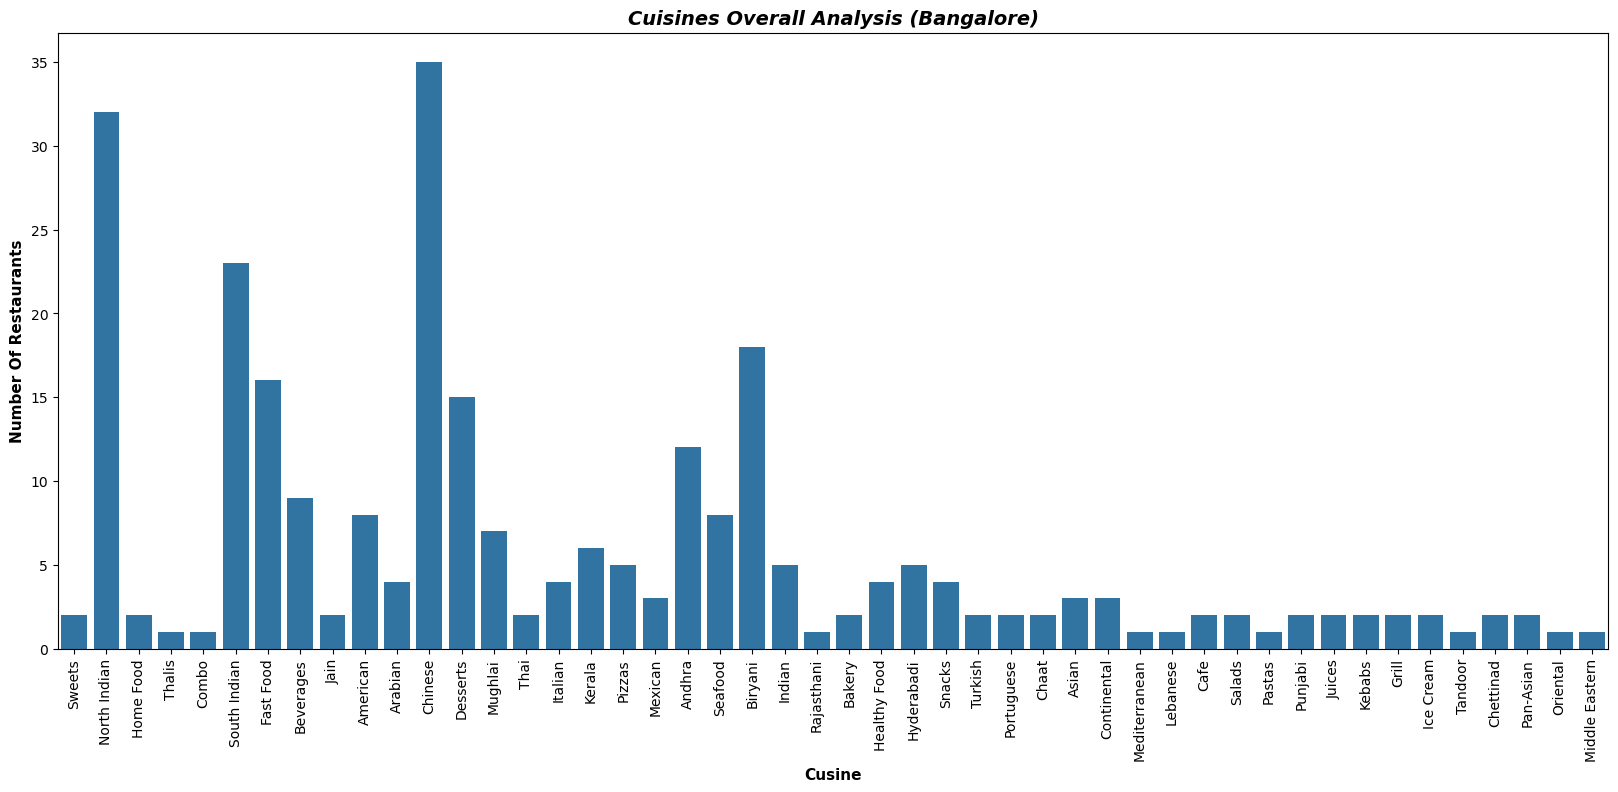

In [151]:
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_Analysis['Cuisine'],
           y=df_Cuisine_Analysis['Count'],
           data=df_Cuisine_Analysis)
plt.xticks(rotation=90)
plt.title('Cuisines Overall Analysis (Bangalore)',
         fontsize=14,
         fontweight='bold',
         fontstyle='italic')
plt.xlabel('Cusine', fontsize=11,fontweight='bold')
plt.ylabel('Number Of Restaurants', fontsize=11, fontweight='bold')
plt.show()

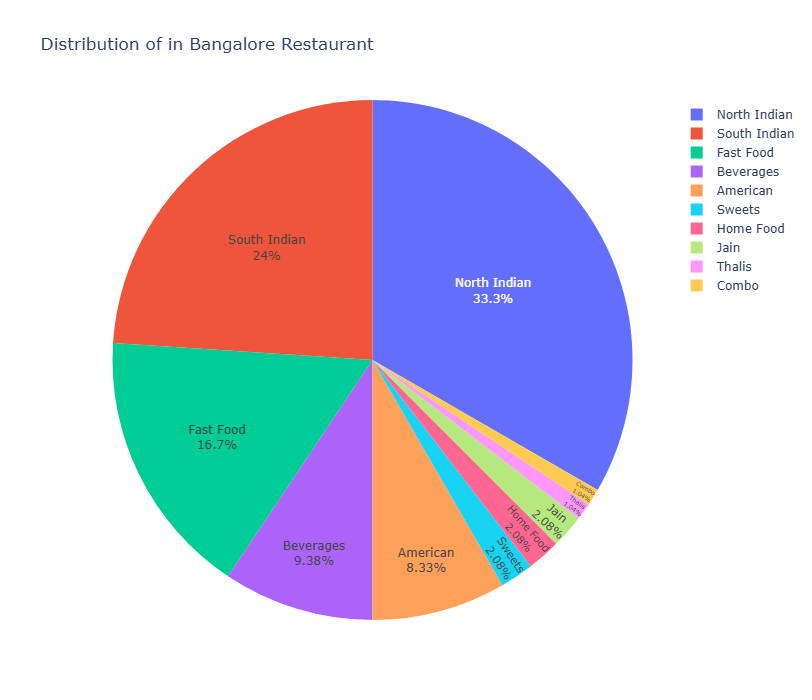

In [152]:
fig=px.pie(
    data_frame=df_Cuisine_Analysis,
    names=df_Cuisine_Analysis['Cuisine'][0:10],
    values=df_Cuisine_Analysis['Count'][0:10],
    title='Distribution of in Bangalore Restaurant',width=700,height=700
)
fig.update_traces(textposition='inside',textinfo="percent+label")
fig.show()

In [153]:
freq_BTM={}
for i in swiggy_BTM['Cuisine'].unique():
    Cuisines_Lists=i.split(',')
    for Cuisine in Cuisines_Lists:
        Cuisine=Cuisine.lstrip(' ')
        if Cuisine in freq_BTM:
            freq_BTM[Cuisine]= freq_BTM[Cuisine]+1 
        else:
            freq_BTM[Cuisine]=1
print(freq_BTM)
print()
print(len(freq_BTM))

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

26


In [154]:
Cuisine= freq_BTM.keys()
freq=freq_BTM.values()
dict_BTM={'Cuisine':Cuisine,'Count':freq}
df_Cuisine_BTM=pd.DataFrame(dict_BTM)
df_Cuisine_BTM.head()

,Cuisine,Count
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10


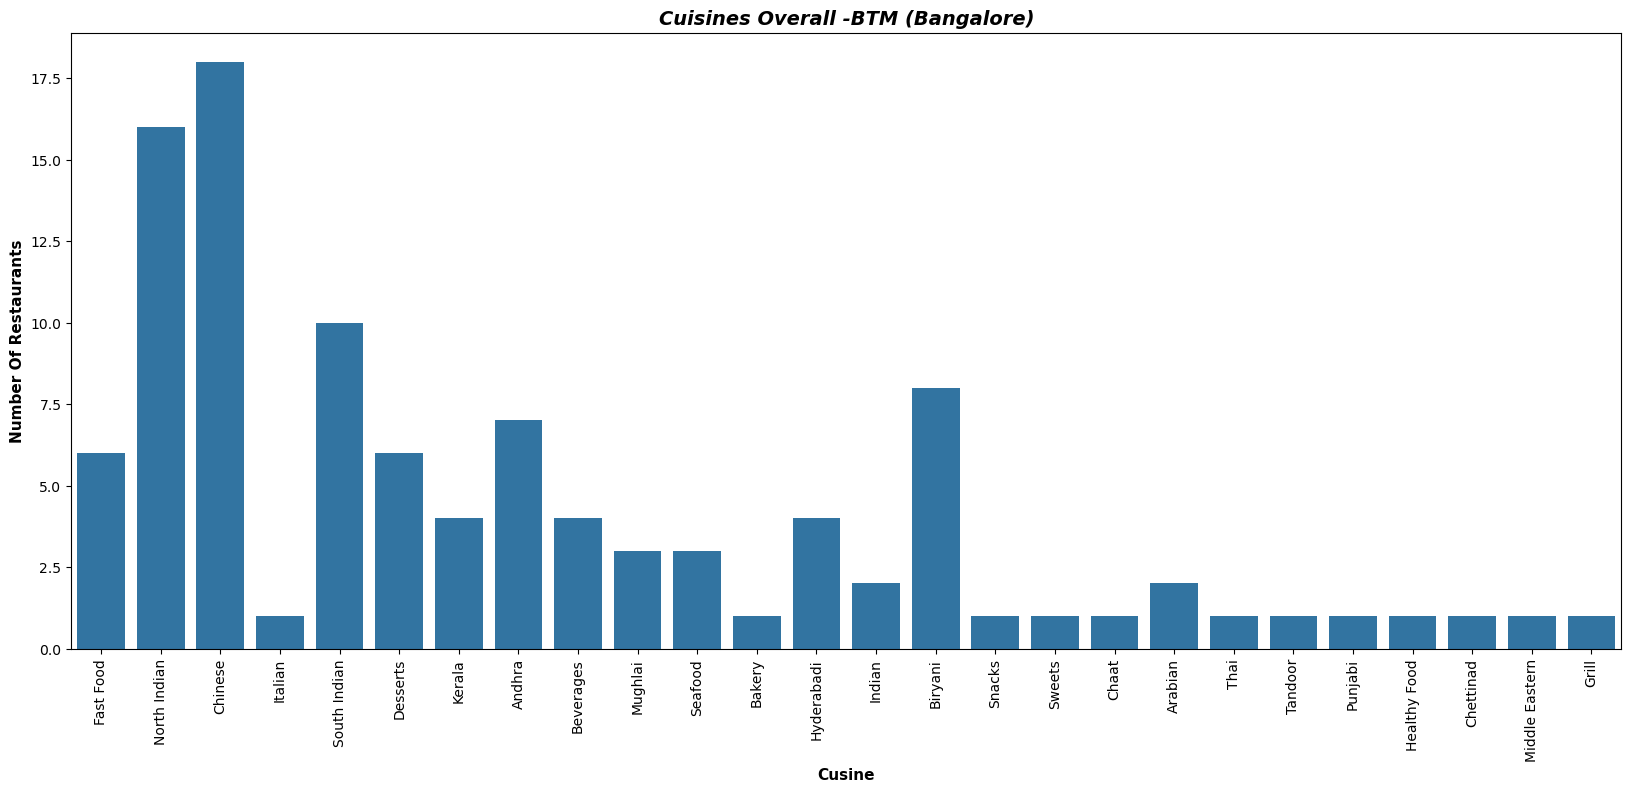

In [155]:
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_BTM['Cuisine'],
           y=df_Cuisine_BTM['Count'],
           data=df_Cuisine_BTM)
plt.xticks(rotation=90)
plt.title('Cuisines Overall -BTM (Bangalore)',
         fontsize=14,
         fontweight='bold',
         fontstyle='italic')
plt.xlabel('Cusine', fontsize=11,fontweight='bold')
plt.ylabel('Number Of Restaurants', fontsize=11, fontweight='bold')
plt.show()

In [156]:
fig=px.pie(
    data_frame=df_Cuisine_BTM,
    names=df_Cuisine_BTM['Cuisine'][0:10],
    values=df_Cuisine_BTM['Count'][0:10],
    title='Distribution of in Bangalore Restaurant',width=700,height=700
)
fig.update_traces(textposition='inside',textinfo="percent+label")
fig.show()

In [157]:
freq_HSR={}
for i in swiggy_HSR['Cuisine'].unique():
    Cuisines_Lists=i.split(',')
    for Cuisine in Cuisines_Lists:
        Cuisine=Cuisine.lstrip(' ')
        if Cuisine in freq_HSR:
            freq_HSR[Cuisine]= freq_HSR[Cuisine]+1 
        else:
            freq_HSR[Cuisine]=1
print(freq_HSR)
print()
print(len(freq_HSR))

{'North Indian': 6, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 4, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 4, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}

24


In [158]:
Cuisine= freq_HSR.keys()
freq=freq_HSR.values()
dict_HSR={'Cuisine':Cuisine,'Count':freq}
df_Cuisine_HSR=pd.DataFrame(dict_BTM)
df_Cuisine_HSR.head()

,Cuisine,Count
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10


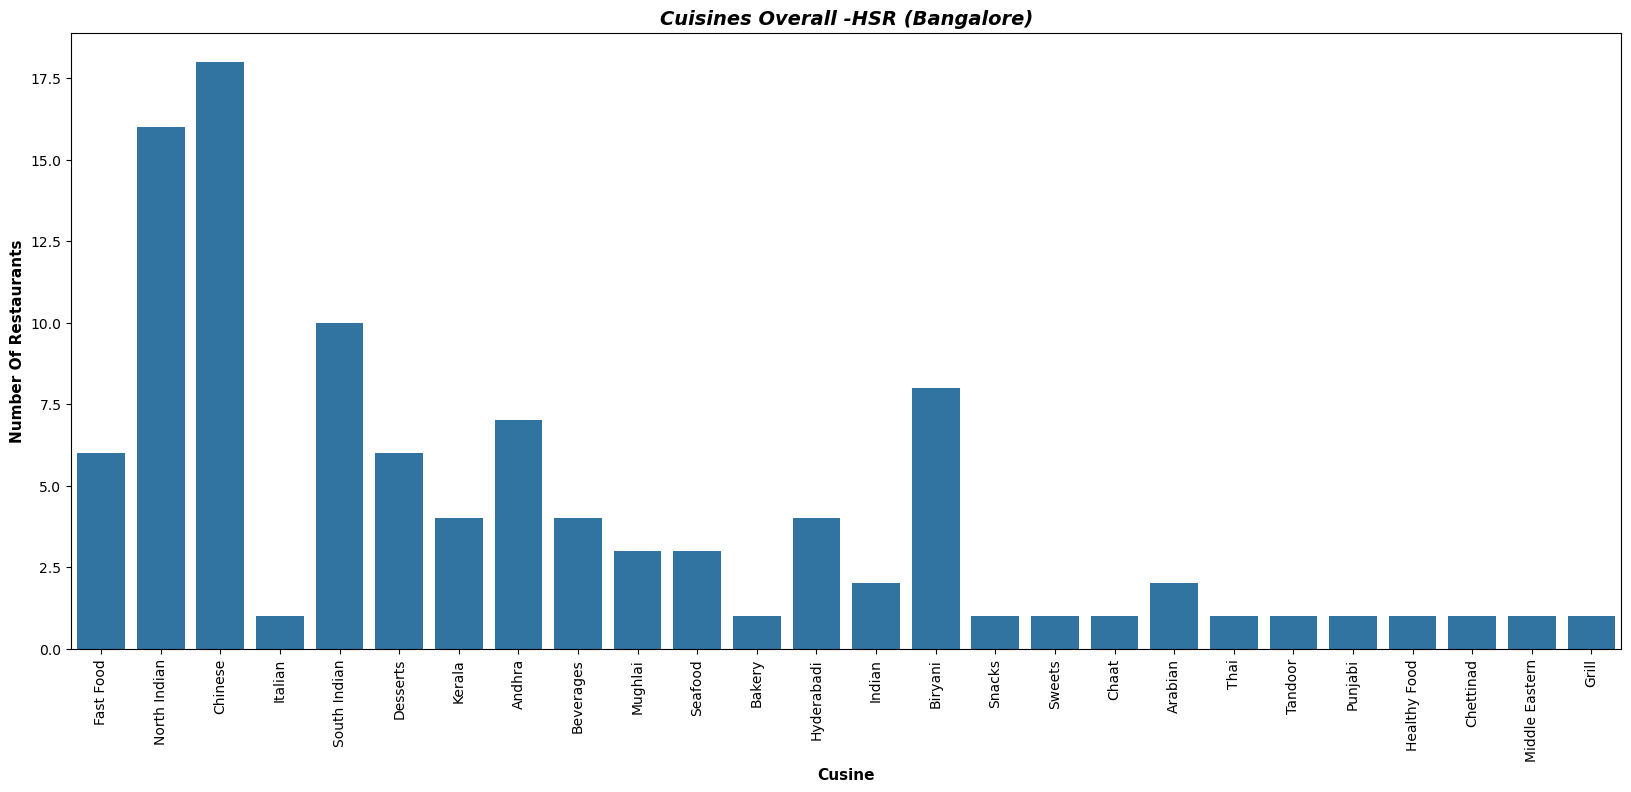

In [159]:
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_HSR['Cuisine'],
           y=df_Cuisine_HSR['Count'],
           data=df_Cuisine_HSR)
plt.xticks(rotation=90)
plt.title('Cuisines Overall -HSR (Bangalore)',
         fontsize=14,
         fontweight='bold',
         fontstyle='italic')
plt.xlabel('Cusine', fontsize=11,fontweight='bold')
plt.ylabel('Number Of Restaurants', fontsize=11, fontweight='bold')
plt.show()

In [160]:
fig=px.pie(
    data_frame=df_Cuisine_HSR,
    names=df_Cuisine_HSR['Cuisine'][0:10],
    values=df_Cuisine_HSR['Count'][0:10],
    title='Distribution of in Bangalore Restaurant',width=700,height=700
)
fig.update_traces(textposition='inside',textinfo="percent+label")
fig.show()

In [161]:
freq_Koramangala={}
for i in swiggy_Koramangala['Cuisine'].unique():
    Cuisines_Lists=i.split(',')
    for Cuisine in Cuisines_Lists:
        Cuisine=Cuisine.lstrip(' ')
        if Cuisine in freq_Koramangala:
            freq_Koramangala[Cuisine]= freq_Koramangala[Cuisine]+1 
        else:
            freq_Koramangala[Cuisine]=1
print(freq_Koramangala)
print()
print(len(freq_Koramangala))

{'Sweets': 1, 'South Indian': 11, 'North Indian': 14, 'Fast Food': 9, 'Beverages': 5, 'Jain': 1, 'Chinese': 15, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 8, 'Andhra': 5, 'Biryani': 10, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 6, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 2, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

42


In [162]:
Cuisine= freq_Koramangala.keys()
freq=freq_Koramangala.values()
dict_Koramangala={'Cuisine':Cuisine,'Count':freq}
df_Cuisine_Koramangala=pd.DataFrame(dict_Koramangala)
df_Cuisine_Koramangala.head()

,Cuisine,Count
0,Sweets,1
1,South Indian,11
2,North Indian,14
3,Fast Food,9
4,Beverages,5


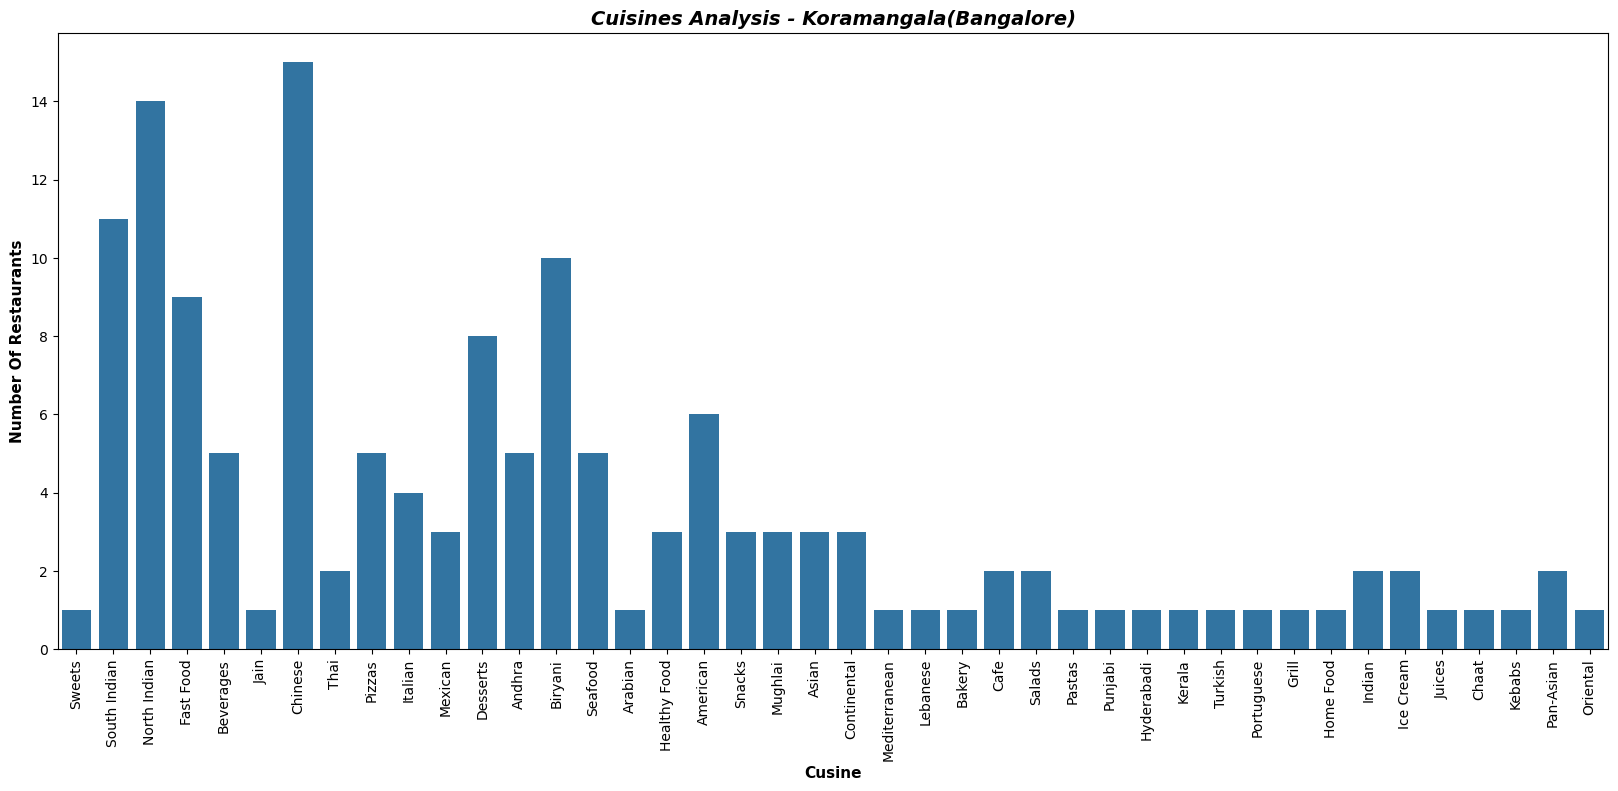

In [163]:
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_Koramangala['Cuisine'],
           y=df_Cuisine_Koramangala['Count'],
           data=df_Cuisine_Koramangala)
plt.xticks(rotation=90)
plt.title('Cuisines Analysis - Koramangala(Bangalore)',
         fontsize=14,
         fontweight='bold',
         fontstyle='italic')
plt.xlabel('Cusine', fontsize=11,fontweight='bold')
plt.ylabel('Number Of Restaurants', fontsize=11, fontweight='bold')
plt.show()

In [164]:
fig=px.pie(
    data_frame=df_Cuisine_Koramangala,names=df_Cuisine_Koramangala['Cuisine'][:10],
    values=df_Cuisine_Koramangala['Count'][:10],
    title='Distribution Of Cuisine in Koramangala Bangalore Restaurants',width=700,height=700)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()